# 第4回課題

## 課題1

ある数numberが7の倍数であるかどうかは、number %  = 0であることに等しい。これを条件分岐で判定してlist appendしていくのが基本方針になる。

ある数の各桁の和を取るには、まずその数を文字数として扱い、forループでイテレーションする。すると各桁の数が一文字づつ取り出せるので、それをint型に戻して合計を取ればよい。この処理を別関数として実装し、lucky_arrayの繰り返し処理の中に組み込むと、望んだ結果が得られる。






In [32]:
def sum_of_digits(n):
    return sum(int(digit) for digit in str(n))

def lucky_array(number):
    a = []
    a.append(False)#配列初期化
    for i in range(number):
        if i % 7 ==0 or sum_of_digits(i) % 7 ==0:
            a.append(True)
        else:
            a.append(False)#この時点で配列の中身は7の倍数がTrue, それ以外はFalse
    return a


In [33]:
#テスト
print(lucky_array(14), lucky_array(7))

[False, True, False, False, False, False, False, False, True, False, False, False, False, False, False] [False, True, False, False, False, False, False, False]


## 課題2

回答方針に従って実装する。

配列の要素を全てTrueとする。


2から連番でNまで増えてゆく整数iを考える。iより大きいiの倍数(合成数)は素数でないので、全てFalseにする。（計算するのはN以下まででよい。）


これをi=2からmath.sqrt(N)回繰り返すと、配列の中でTrueとなったものが素数である。



In [34]:
import math

def prime_array(n):

    a = [True] * n
    a[0] = a[1] = False#初期化

    for i in range(2, int(math.sqrt(n)) + 1):
        if a[i]:
            for j in range(i * i, n, i):
                a[j] = False#この時点で、aの中でFalseな数は全て合成数

    primes = [i for i in range(n) if a[i]]

    return primes

In [35]:
# テスト
print(prime_array(56))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]


## 課題3

必要な処理は次の通りになる。



1.   与えられた二次元配列をコピーする
2.   コピーされた配列の横、縦方向についてそれぞれ合計を取る

横方向の合計は、単純にsum(array[i])を行の数だけ計算すればよい。

縦方向の合計は、二重ループが必要になる。最初のループで列を指定し、その中で各行の値を足し合わせ、配列に代入していけば望んだ結果が得られる。





In [36]:
def make2d(height, width):
    return [[0 for _ in range(width)] for _ in range(height)]

def extend_sum(a):

    rows = len(a)
    cols = len(a[0])

    result = make2d(rows+1, cols+1)#配列を初期化

    for i in range(rows):
        for j in range(cols):
            result[i][j] = a[i][j]

    for i in range(rows):
        row_sum = sum(a[i])
        result[i][cols] = row_sum

    for j in range(cols):
        col_sum = sum(a[i][j] for i in range(rows))
        result[rows][j] = col_sum

    total_sum = sum(result[rows][j] for j in range(cols))
    result[rows][cols] = total_sum

    return result


In [37]:
# テスト
array = [[1, 2, 3], [10, 20, 30]]
extend_sum(array)

[[1, 2, 3, 6], [10, 20, 30, 60], [11, 22, 33, 66]]

## 課題4

まずinside関数を定義する。フィールドの行数よりrが大きいか、フィールドの列数よりcが大きいかをそれぞれ判定し、座標がフィールド内部にある場合はTrue, そうでない場合はFalseを返す。

count関数では、forループで8近傍を総探索する。-1～1の間で連番を取るdc, drを作成し、これらが0でなく, フィールドの内部にある場合に、そのマスの生死を取得し、カウントを増やす。ループ終了時のカウントが生きているマスの数である。

next_cell_livingでは、生死を表すlivingと8近傍内に生きているマスの数neighbour_countを引数とし、そのマスの次の時刻における生死を求める。マスの生死は提示された規則に従う。living=1を返すのは、現在のlivingが1かつneighbour_countが2or3の場合、もしくは現在のlivingが0かつcountが3の場合である。それ以外は全て0を返す。

最後にnext_fieldを作る。現在の生死がBool値で与えられたフィールドを引数として、ライフゲームにおける次の状態を返す。処理の内容は以下の通りである。


*   与えられたフィールドと同サイズかつ全てFalseのフィールドを作る
*   与えられたフィールドからあるマスを選び、そのliving値を取得する。その後、count関数で8近傍の生存マス数を取得する
*   next_cell_living関数を使って、上記で得られたパラメータからそのマスの次の生死を決め、作成されたフィールドに代入する
*   これを与えられたフィールドの全てのマスについて行う









In [38]:
def inside(field, r, c):
    return 0 <= r < len(field) and 0 <= c < len(field[0])

def count(field, r, c):
    neighbor_count = 0
    for dr in range(-1, 2):
        for dc in range(-1, 2):
            if dr == 0 and dc == 0:
                continue
            if inside(field, r + dr, c + dc) and field[r + dr][c + dc]:
                neighbor_count += 1#この時点でneighbor_countは生きているマスの数
    return neighbor_count

def next_cell_living(living, neighbor_count):
    if living:
        return 1 if neighbor_count in (2, 3) else 0
    else:
        return 1 if neighbor_count == 3 else 0

def next_field(a):
    height, width = len(a), len(a[0])
    next_a = [[False] * width for _ in range(height)]
    for r in range(height):
        for c in range(width):
            living = a[r][c]
            neighbor_count = count(a, r, c)
            next_a[r][c] = next_cell_living(living, neighbor_count) == 1
    return next_a


In [39]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
def plot(array2d):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    im = ax.imshow(array2d, interpolation="nearest", cmap="Greys")
    plt.show()

In [40]:
# テスト
a=[[False, True, False, False, False], [False, False, True, False, False], [True, True, True, False, False], [False, False, False, False, False], [False, False, False, False, False]]
next_field(a)

[[False, False, False, False, False],
 [True, False, True, False, False],
 [False, True, True, False, False],
 [False, True, False, False, False],
 [False, False, False, False, False]]

<IPython.core.display.Javascript object>


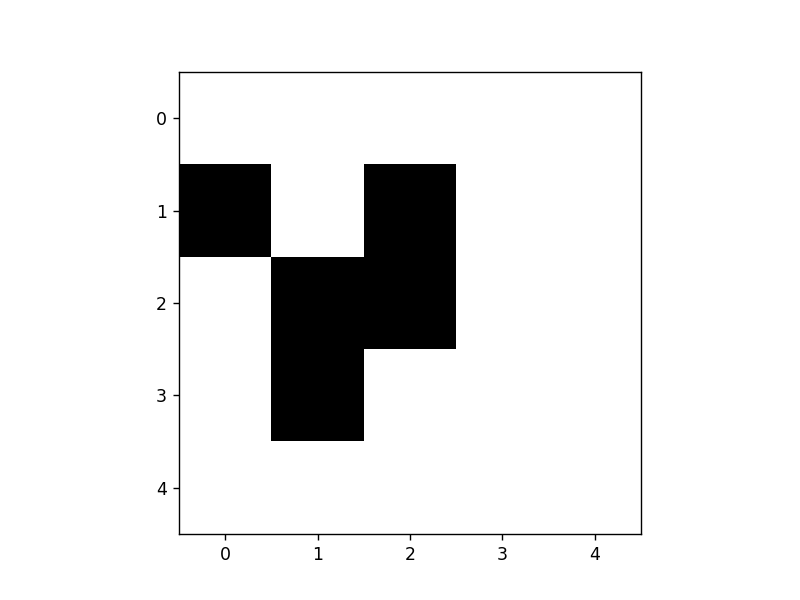

In [41]:
plot(next_field(a))

## 課題5

ここではGliderとLightweight Spaceshipを試してみる。

animationのさせかたは授業資料を参考にした。

animationの保存については、以下を参照した。https://qiita.com/skotaro/items/430e03b61cc6f069d263#saving%E3%83%A1%E3%82%BD%E3%83%83%E3%83%89grab_frame%E3%83%A1%E3%82%BD%E3%83%83%E3%83%89

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def make_field(height, width, living):
    field = [[False] * width for _ in range(height)]
    for r, c in living:
        field[r][c] = True
    return field

def show_animation(initial_field, steps):
    fig, ax = plt.subplots()
    field = initial_field
    ims = []

    for i in range(steps):
        im = ax.imshow(field, animated=True, cmap='Greys', interpolation='nearest')
        ims.append([im])
        field = next_field(field)

    anim = animation.ArtistAnimation(fig, ims, interval=500, blit=True)
    plt.show()
    return anim, ims


<IPython.core.display.Javascript object>


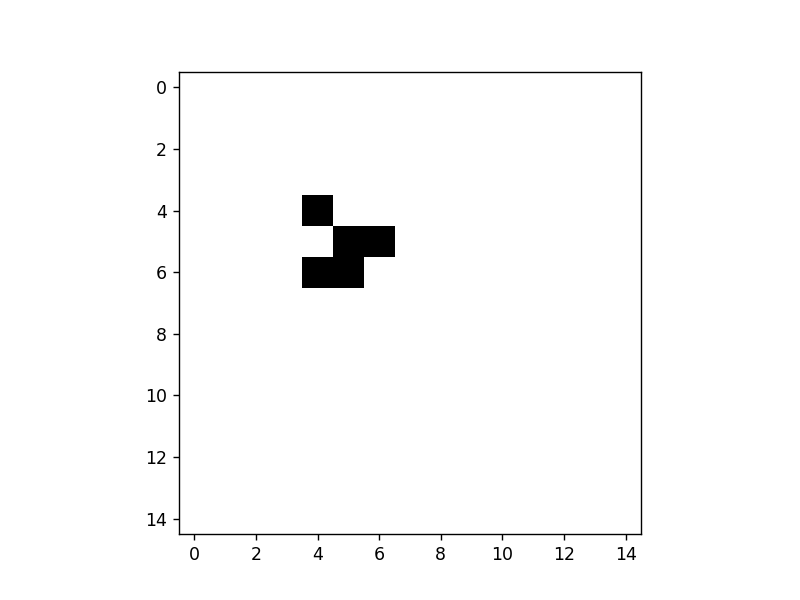

In [43]:
from matplotlib.animation import PillowWriter

glider = [[1, 2], [2, 3], [3, 1], [3, 2], [3, 3]]

initial_field = make_field(15, 15, glider)
anim, glider_images = show_animation(initial_field, 50)

anim.save('glider_animation.gif', writer=PillowWriter())


<IPython.core.display.Javascript object>


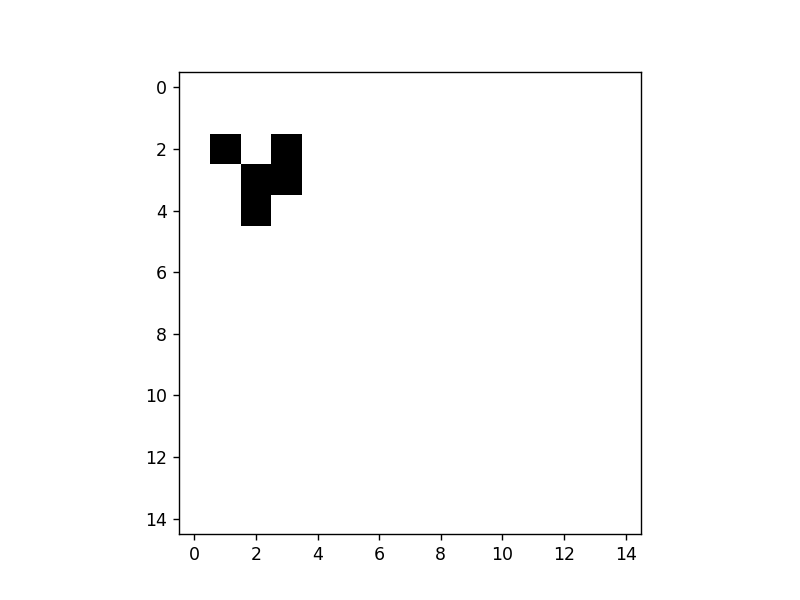

In [44]:
#初期配置
plot(next_field(initial_field))

<IPython.core.display.Javascript object>


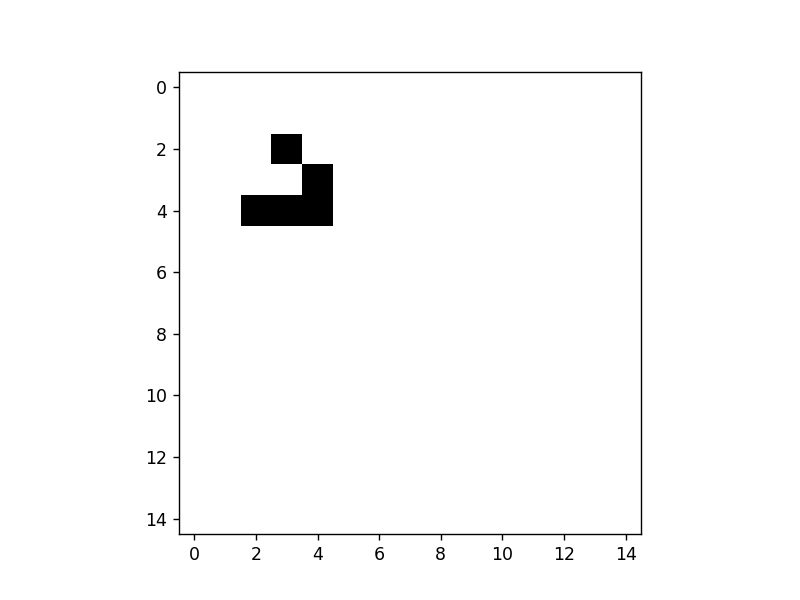

In [45]:
#特徴的な時刻のテストケース（相対的に最もグライダーに見えるところ）
for i in range(3):
  initial_field=next_field(initial_field)
plot(next_field(initial_field))

<IPython.core.display.Javascript object>


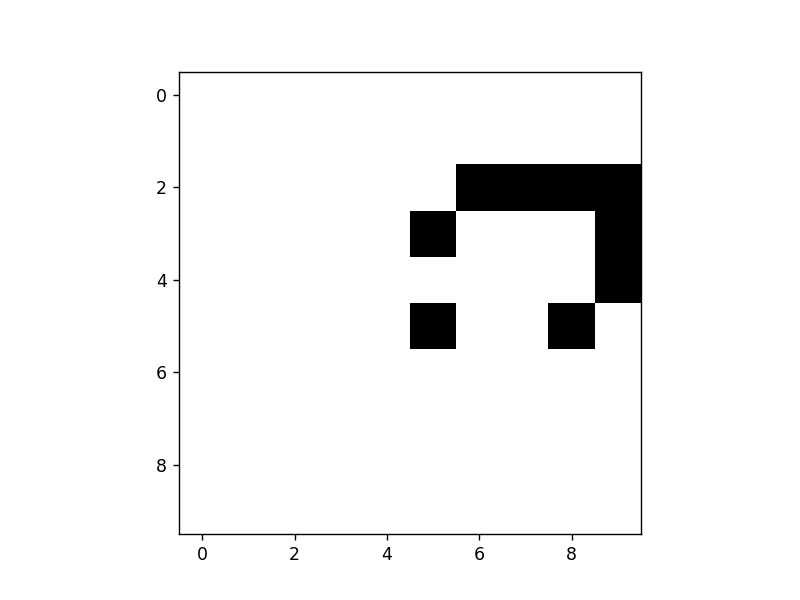

In [46]:
lwss = [
        [1, 0], [1, 3],
        [2, 4],
        [3, 0], [3, 4],
        [4, 1], [4, 2], [4, 3], [4, 4]
    ]

initial_field = make_field(10, 10, lwss)
anim, lwss_images = show_animation(initial_field, 50)
anim.save('lwss_animation.gif', writer=PillowWriter())


<IPython.core.display.Javascript object>


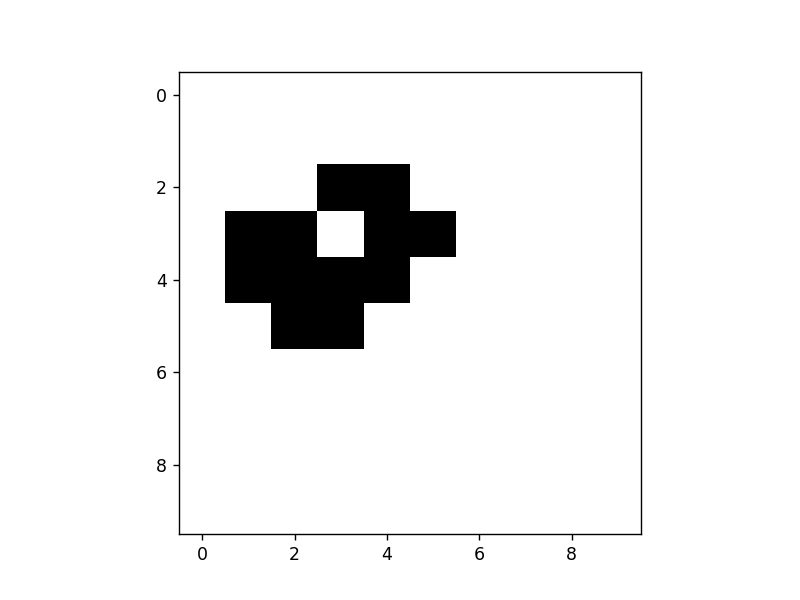

In [47]:
#初期配置
plot(next_field(initial_field))

<IPython.core.display.Javascript object>


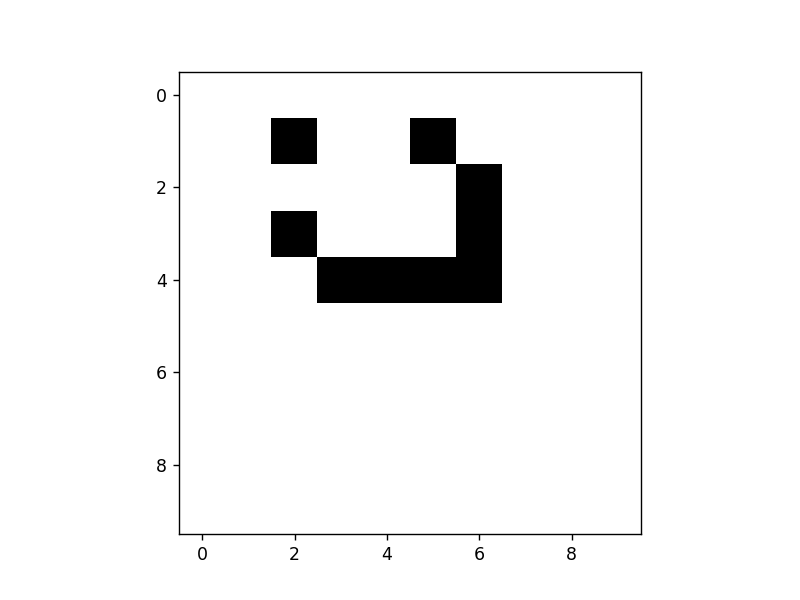

In [48]:
#特徴的な時刻（宇宙船・・・なのか？）
for i in range(3):
  initial_field=next_field(initial_field)
plot(next_field(initial_field))